<a href="https://colab.research.google.com/github/kartthik-18/AI-projects-for-resume/blob/main/Kartthik_VGG_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
import torchvision.transforms as transforms

batch_size = 32

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))          # Normalization
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#Visulizing some of the training images, for fun.

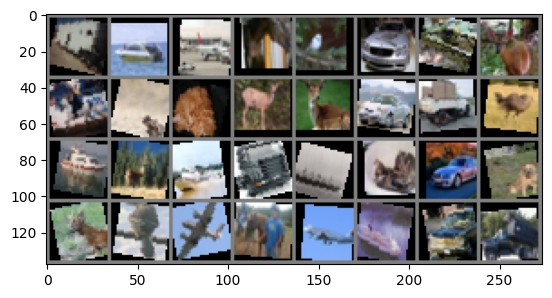

truck ship  plane horse bird  car   frog  deer  horse frog  cat   deer  deer  car   truck bird  ship  deer  ship  truck ship  cat   car   dog   deer  bird  plane horse plane ship  car   truck


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


Define a Convolutional Neural Network (VGG -11)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class VGG11_NBN(nn.Module):   #No batch normalization
    def __init__(self, num_classes=10):
        super(VGG11_NBN, self).__init__()
        self.features=nn.Sequential(
            nn.Conv2d(3,64,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128,256,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256,512,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.ReLU(inplace=True),


            nn.MaxPool2d(kernel_size=2, stride=2),
            )

        self.fc=nn.Sequential(
            nn.Linear(512,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),

            nn.Linear(4096,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),

            nn.Linear(4096,num_classes),
            )

    def forward(self,x):
        x=self.features(x)
        x=x.view(x.size(0),-1)
        x=self.fc(x)
        return x

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class VGG11_BN(nn.Module):   #With batch normalization
    def __init__(self, num_classes=10):
        super(VGG11_BN, self).__init__()
        self.features=nn.Sequential(
            nn.Conv2d(3,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),


            nn.MaxPool2d(kernel_size=2, stride=2),
            )

        self.fc=nn.Sequential(
            nn.Linear(512,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),

            nn.Linear(4096,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),

            nn.Linear(4096,num_classes),
            )

    def forward(self,x):
        x=self.features(x)
        x=x.view(x.size(0),-1)
        x=self.fc(x)
        return x

Implent the VGG -11 Architecture below

In [ ]:
import torch.optim as optim

def train_model(model,trainloader,testloader,num_epochs=10):
    model=model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer=optim.Adam(model.parameters(),lr=0.001)

    train_loss_list = []
    train_acc_list = []
    val_loss_list = []
    val_acc_list = []


    for epoch in range(num_epochs):
        model.train()
        running_loss=0
        correct=0
        total=0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(trainloader)
        train_acc = 100 * correct / total
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)


        #validation
        model.eval()
        val_loss=0
        val_correct=0
        val_total=0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(testloader)
        val_acc = 100 * val_correct / val_total
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}] '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    return train_loss_list, train_acc_list, val_loss_list, val_acc_list

In [ ]:
# Without BatchNorm
model_no_bn = VGG11_NBN()
train_loss_no_bn, train_acc_no_bn, val_loss_no_bn, val_acc_no_bn = train_model(model_no_bn, trainloader, testloader, num_epochs=10)

# With BatchNorm
model_bn = VGG11_BN()
train_loss_bn, train_acc_bn, val_loss_bn, val_acc_bn = train_model(model_bn, trainloader, testloader, num_epochs=10)


Epoch [1/10] Train Loss: 1.9900, Train Acc: 20.53% Val Loss: 1.8205, Val Acc: 27.52%
Epoch [2/10] Train Loss: 1.6950, Train Acc: 34.44% Val Loss: 1.4906, Val Acc: 42.57%
Epoch [3/10] Train Loss: 1.5140, Train Acc: 43.54% Val Loss: 1.4013, Val Acc: 48.52%
Epoch [4/10] Train Loss: 1.4071, Train Acc: 48.38% Val Loss: 1.2655, Val Acc: 53.03%
Epoch [5/10] Train Loss: 1.3231, Train Acc: 51.98% Val Loss: 1.1789, Val Acc: 56.57%
Epoch [6/10] Train Loss: 1.2763, Train Acc: 54.62% Val Loss: 1.1991, Val Acc: 57.19%
Epoch [7/10] Train Loss: 1.2298, Train Acc: 56.61% Val Loss: 1.1129, Val Acc: 60.08%
Epoch [8/10] Train Loss: 1.1962, Train Acc: 57.99% Val Loss: 1.1042, Val Acc: 60.81%
Epoch [9/10] Train Loss: 1.1656, Train Acc: 59.36% Val Loss: 1.0118, Val Acc: 64.09%
Epoch [10/10] Train Loss: 1.1463, Train Acc: 59.84% Val Loss: 1.0702, Val Acc: 62.70%
Epoch [1/10] Train Loss: 1.9166, Train Acc: 24.78% Val Loss: 1.6733, Val Acc: 34.11%
Epoch [2/10] Train Loss: 1.6457, Train Acc: 36.04% Val Loss: 1.5

In [ ]:
torch.save(model_no_bn.state_dict(), 'model_vgg11_no_bn.pth')
torch.save(model_bn.state_dict(), 'model_vgg11_bn.pth')

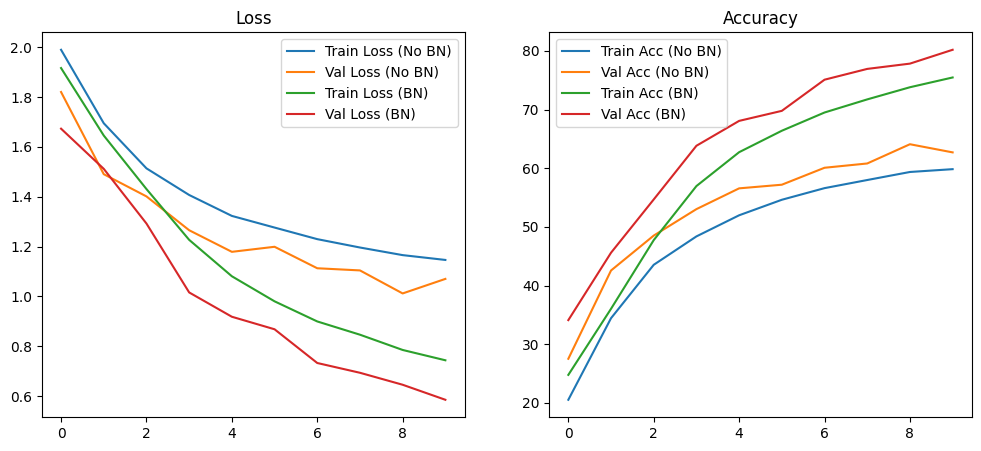

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_no_bn, label="Train Loss (No BN)")
plt.plot(val_loss_no_bn, label="Val Loss (No BN)")
plt.plot(train_loss_bn, label="Train Loss (BN)")
plt.plot(val_loss_bn, label="Val Loss (BN)")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(train_acc_no_bn, label="Train Acc (No BN)")
plt.plot(val_acc_no_bn, label="Val Acc (No BN)")
plt.plot(train_acc_bn, label="Train Acc (BN)")
plt.plot(val_acc_bn, label="Val Acc (BN)")
plt.legend()
plt.title("Accuracy")

plt.show()

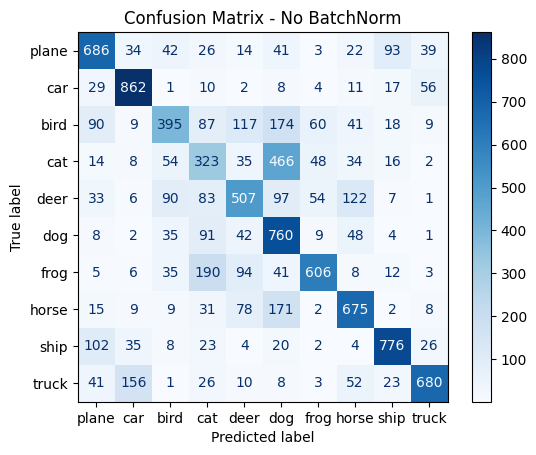

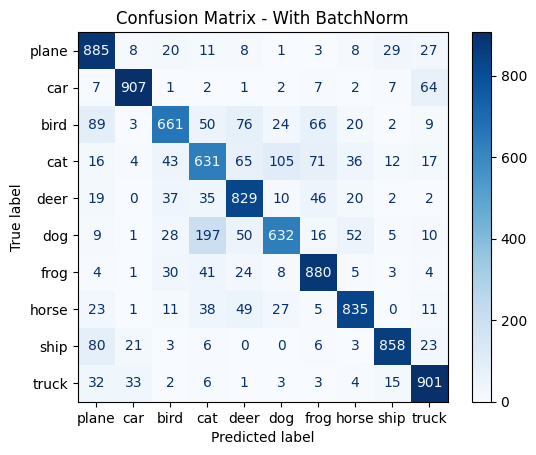

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, dataloader, title):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(model_no_bn, testloader, "Confusion Matrix - No BatchNorm")
plot_confusion_matrix(model_bn, testloader, "Confusion Matrix - With BatchNorm")

Finally pick any 10 random images, plot them with their corresponding predicted class and the ground truth

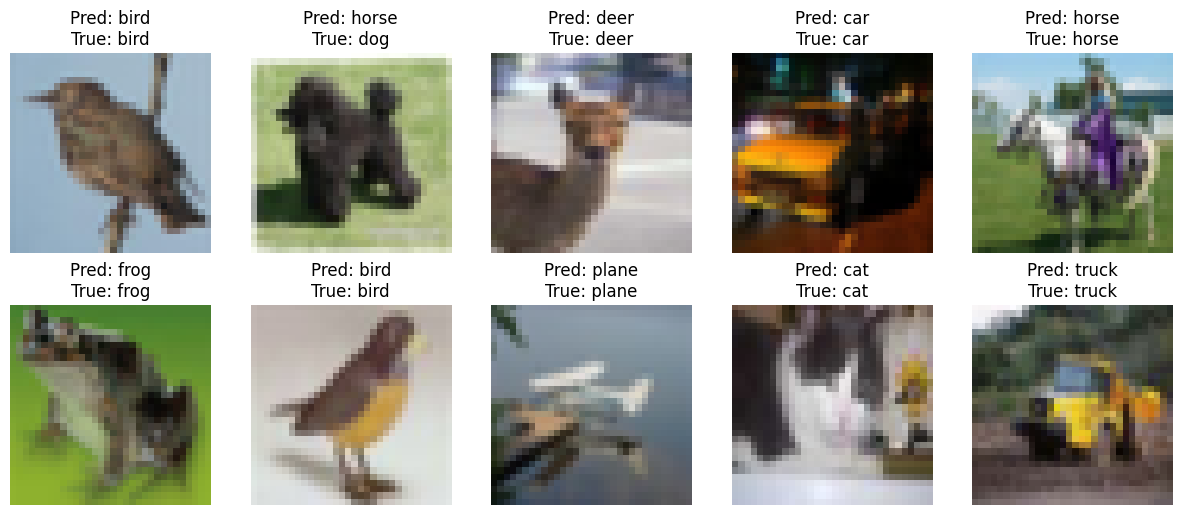

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Make sure model is in eval mode
model_bn.eval()  # or model_no_bn.eval() depending on which model you want

# Select 10 random indices
indices = random.sample(range(len(testset)), 10)

# Extract the images and true labels
images = torch.stack([testset[i][0] for i in indices])
true_labels = [testset[i][1] for i in indices]

# Move images to device
images_device = images.to(device)

# Get predictions
with torch.no_grad():
    outputs = model_bn(images_device)  # or model_no_bn if you want
    _, predicted_labels = torch.max(outputs, 1)

# Plotting
plt.figure(figsize=(15, 6))

for i in range(10):
    img = images[i].cpu()  # move back to CPU for plotting
    img = img / 2 + 0.5  # unnormalize (since you normalized with 0.5, 0.5, 0.5 before)

    npimg = img.numpy()
    plt.subplot(2, 5, i+1)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title(f"Pred: {classes[predicted_labels[i].item()]}\nTrue: {classes[true_labels[i]]}")

plt.show()
